# Import libraries and data file

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import plotly.express as px


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, _extrapolate_trend
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA


In [5]:
# File is hourly productivity as a % change from the previous year

global_temps = pd.read_csv('data/GlobalTemperatures.csv', header=0)
global_temps

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,8/1/2015,14.755
3188,9/1/2015,12.999
3189,10/1/2015,10.801
3190,11/1/2015,7.433


### Clean and separate into training and test sets

In [6]:
global_temps.dropna(inplace=True)
global_temps['dt'] = pd.to_datetime(global_temps['dt'], format='mixed')
global_temps.set_index(['dt'], inplace=True)
global_temps.dtypes


LandAverageTemperature    float64
dtype: object

In [7]:
# It's a lot of data and the earlier data seems a bit suspect,
# so let's begin on Jan 01, 1800
global_temps_train = global_temps['1800-01-01':'2013-12-01']
global_temps_test = global_temps['2014-01-01':]
#global_temps_test

### Create our STL model and a Forecast model from past data

In [ ]:

global_temps_stl = STL(global_temps_train, period = 12)
global_temps_model = global_temps_stl.fit()

global_temps_forecast = STLForecast(global_temps_train, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"})
global_temps_predictor = global_temps_forecast.fit()
# to predict future results, call
# global_temps_predictor.forecast(len(global_temps_test)) ,
# where len(...) is the number of increments you'd like to predict


### Compare the model to a section of previous data
Find MAE and RMSE to compare

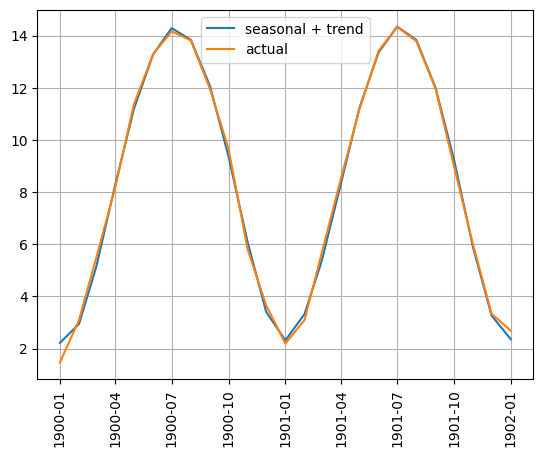

In [13]:
season_and_trend = global_temps_model.seasonal + global_temps_model.trend

plt.plot(season_and_trend['1900-01-01':'1902-01-01'], label = 'seasonal + trend')
plt.plot(global_temps_train['1900-01-01':'1902-01-01'], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

In [14]:
pred_error2 = season_and_trend['1900-01-01':'1902-01-01'] - global_temps_train['1900-01-01':'1902-01-01'].LandAverageTemperature
mae2 = np.abs(pred_error2).mean()
rmse2 = np.sqrt((pred_error2**2).mean())
print(f'Mean Absolute Error: {mae2}')
print(f'Root Mean Squared Error: {rmse2}')

Mean Absolute Error: 0.17780856372685258
Root Mean Squared Error: 0.23750762426613148


# Observed Data

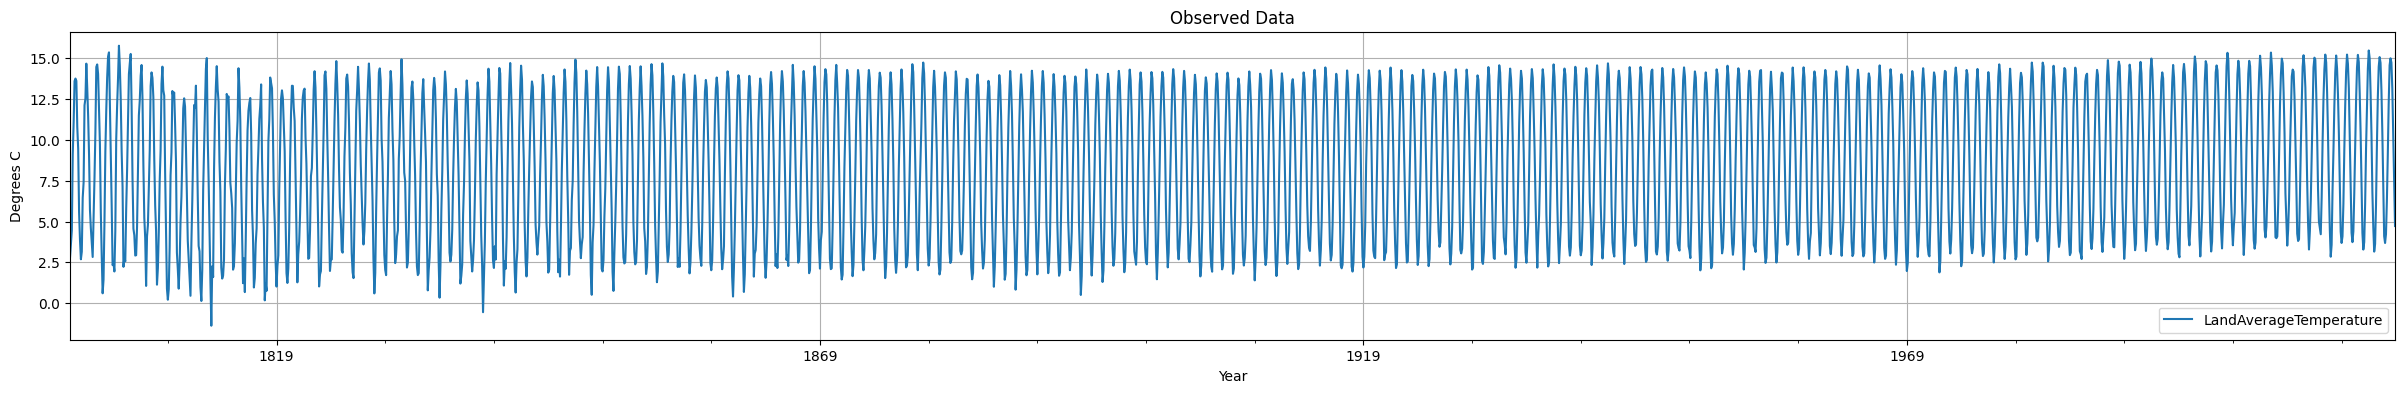

In [16]:
global_temps_model.observed.plot(figsize=(30,4))
plt.title('Observed Data')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

# Trendline

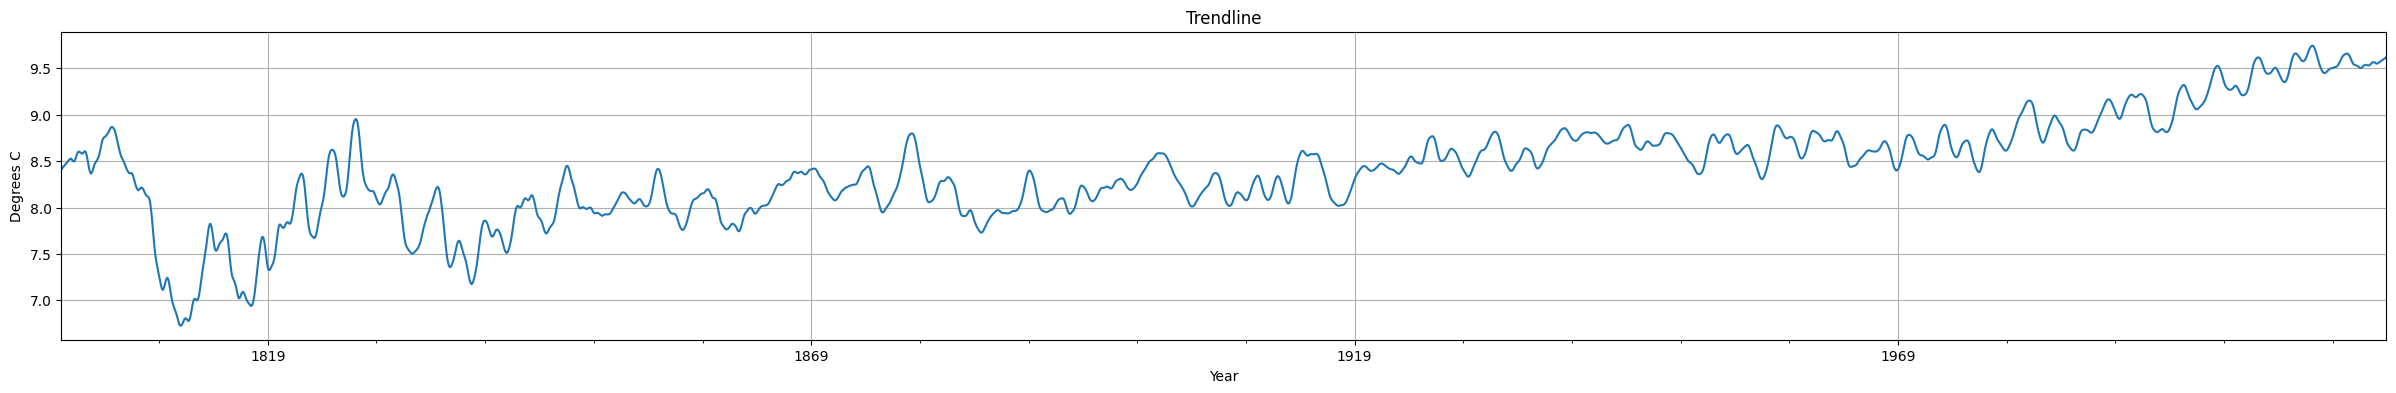

In [18]:
global_temps_model.trend.plot(figsize=(30,4))
plt.title('Trendline')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

# Seasonal Variation

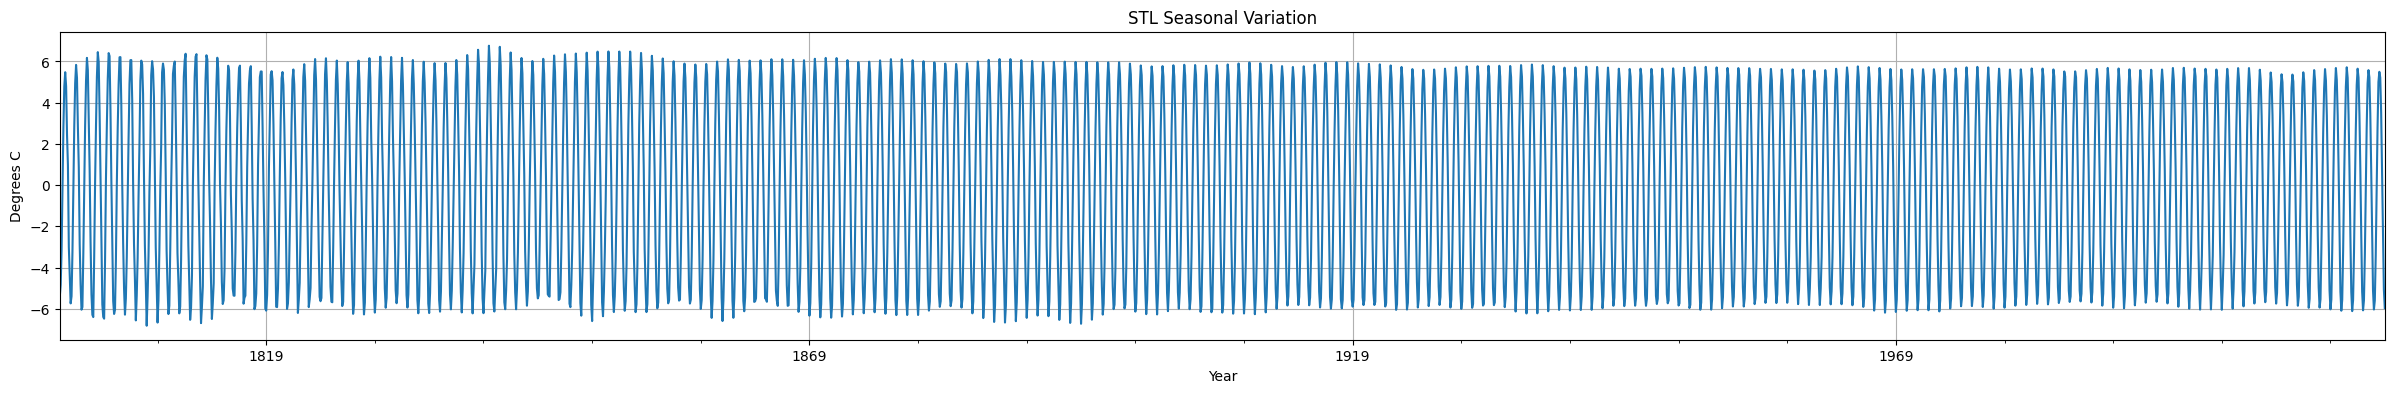

In [7]:
global_temps_model.seasonal.plot(figsize=(30,4))
plt.title('STL Seasonal Variation')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

# Residuals

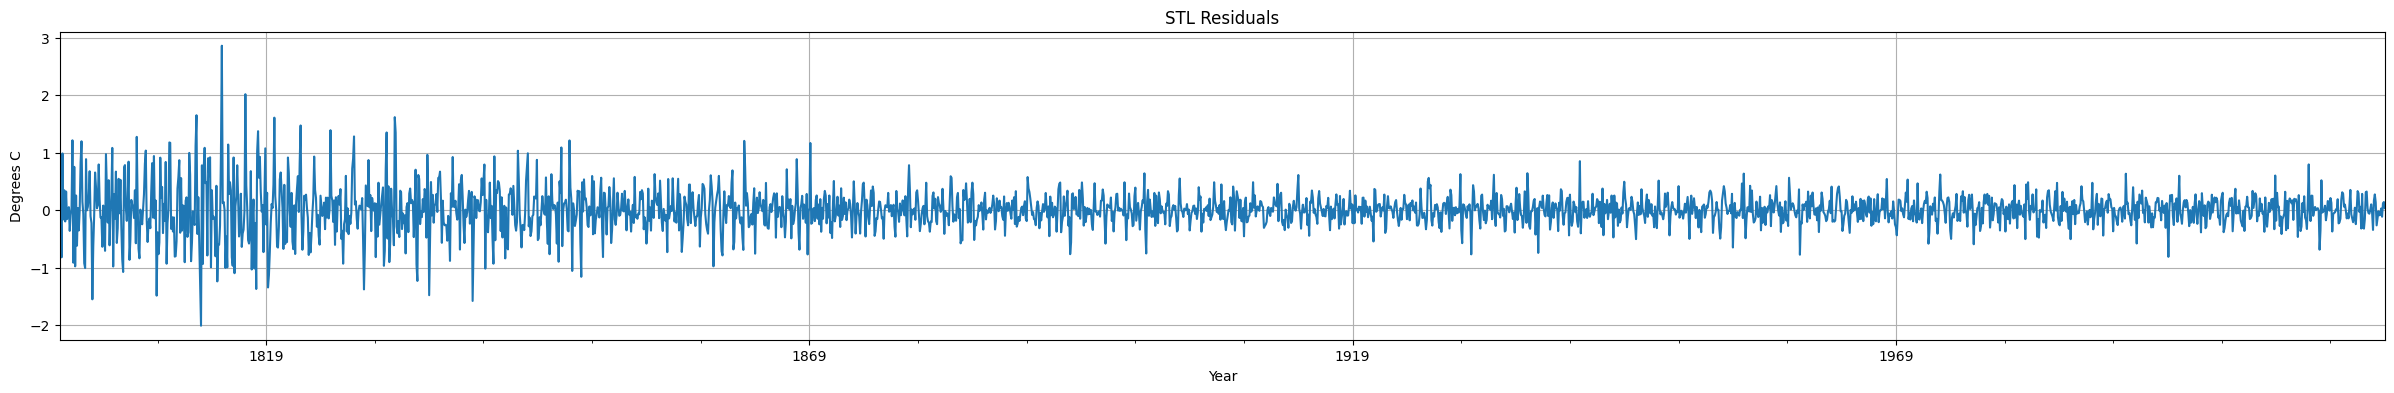

In [8]:
global_temps_model.resid.plot(figsize=(30,4))
plt.title('STL Residuals')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

# Forecast into far future

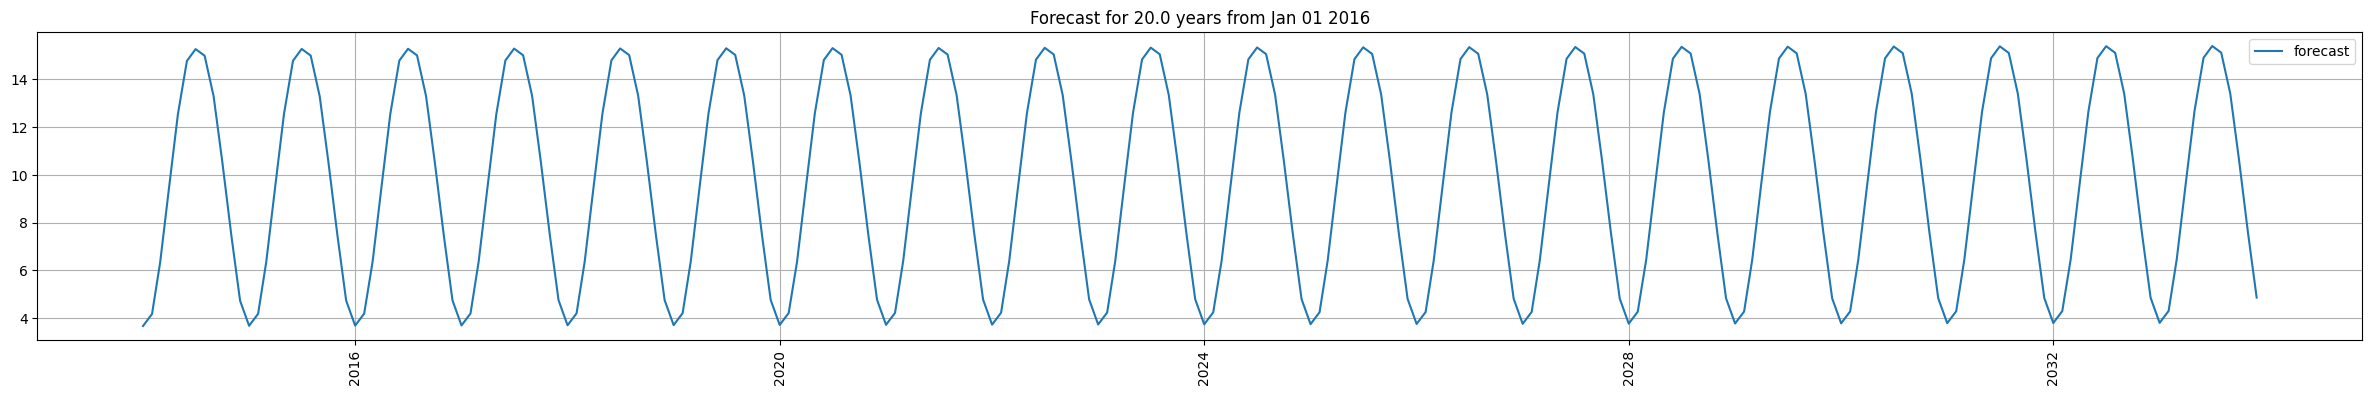

In [28]:
# num is the number of months you want to predict
num = 240
far_forecast = global_temps_predictor.forecast(num)
plt.figure(figsize=(30,4))
plt.plot(far_forecast, label = 'forecast')
plt.legend()
plt.title(f'Forecast for {num/12} years from Jan 01 2016')
plt.grid()
plt.xticks(rotation = 90);
#plt.figure(figsize=(30,4))

# Forecast Model Error

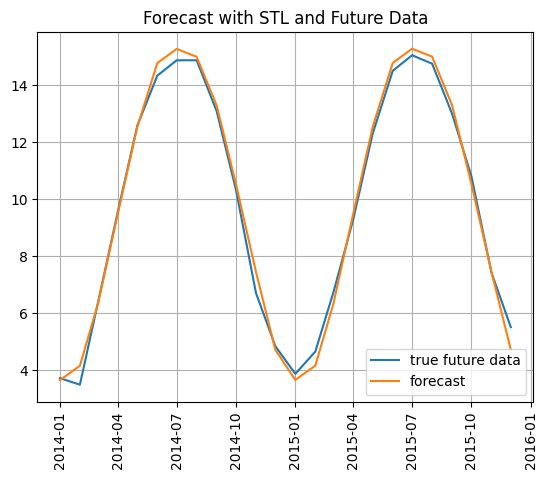

In [19]:
forecast = global_temps_predictor.forecast(len(global_temps_test))

plt.plot(global_temps_test, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid()
plt.xticks(rotation = 90);

In [49]:
pred_error = global_temps_test.LandAverageTemperature - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.2834472547646842
Root Mean Squared Error: 0.35272508125358293
